In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/yoges/Desktop/ENPM 808W Data Science/hw1/top250.csv")
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [2]:
df['Team_to'].value_counts().head()
# This is to see which Team had most Transfers to in the whole dataset 

Inter       97
Chelsea     96
Man City    94
Spurs       93
Juventus    87
Name: Team_to, dtype: int64

In [3]:
#Top 15 Teams spending money in buying Players for the whole dataset
top_spending = df.groupby("Team_to").Transfer_fee.sum().sort_values(ascending= False).head(15)
print(top_spending)

Team_to
Chelsea            1820650000
Man City           1800520000
Real Madrid        1680650000
FC Barcelona       1673040000
Man Utd            1497360000
Juventus           1470940000
Liverpool          1412420000
Paris SG           1274780000
Inter              1202690000
Spurs              1024400000
AC Milan            941350000
Atlético Madrid     918810000
Arsenal             899060000
AS Roma             826380000
Bayern Munich       812350000
Name: Transfer_fee, dtype: int64


In [4]:
#Top 5 Earning teams by selling their players
top_earning = df.groupby("Team_from").Transfer_fee.sum().sort_values(ascending = False).head(5)
print(top_earning)

Team_from
Monaco         948170000
FC Porto       917550000
Real Madrid    891400000
Chelsea        839530000
Liverpool      798410000
Name: Transfer_fee, dtype: int64


In [5]:
#Looking into Most Expensive Transfers per Season
Exp_transfer = df.groupby(['Season']).max()[['Transfer_fee']] 
print(Exp_transfer)

           Transfer_fee
Season                 
2000-2001      60000000
2001-2002      77500000
2002-2003      46000000
2003-2004      37500000
2004-2005      38500000
2005-2006      38000000
2006-2007      43300000
2007-2008      38000000
2008-2009      43000000
2009-2010      94000000
2010-2011      58500000
2011-2012      42000000
2012-2013      42000000
2013-2014     101000000
2014-2015      81720000
2015-2016      76000000
2016-2017     105000000
2017-2018     222000000
2018-2019     135000000


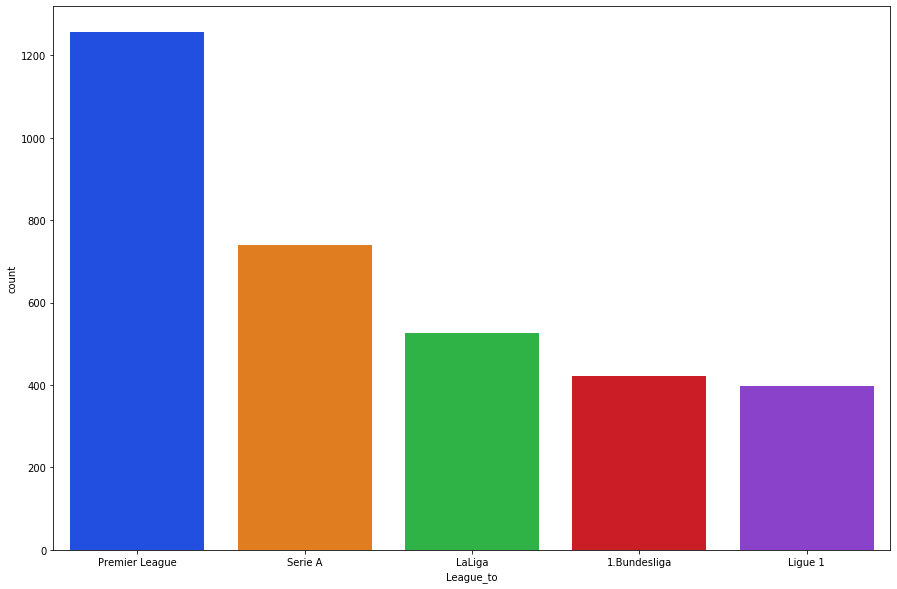

In [6]:
#Top 5 Leagues Most players were transferred to
plt.figure(figsize = (15,10))
sns.countplot(x= 'League_to',data = df,order = df['League_to'].value_counts().head(5).index,palette = 'bright')

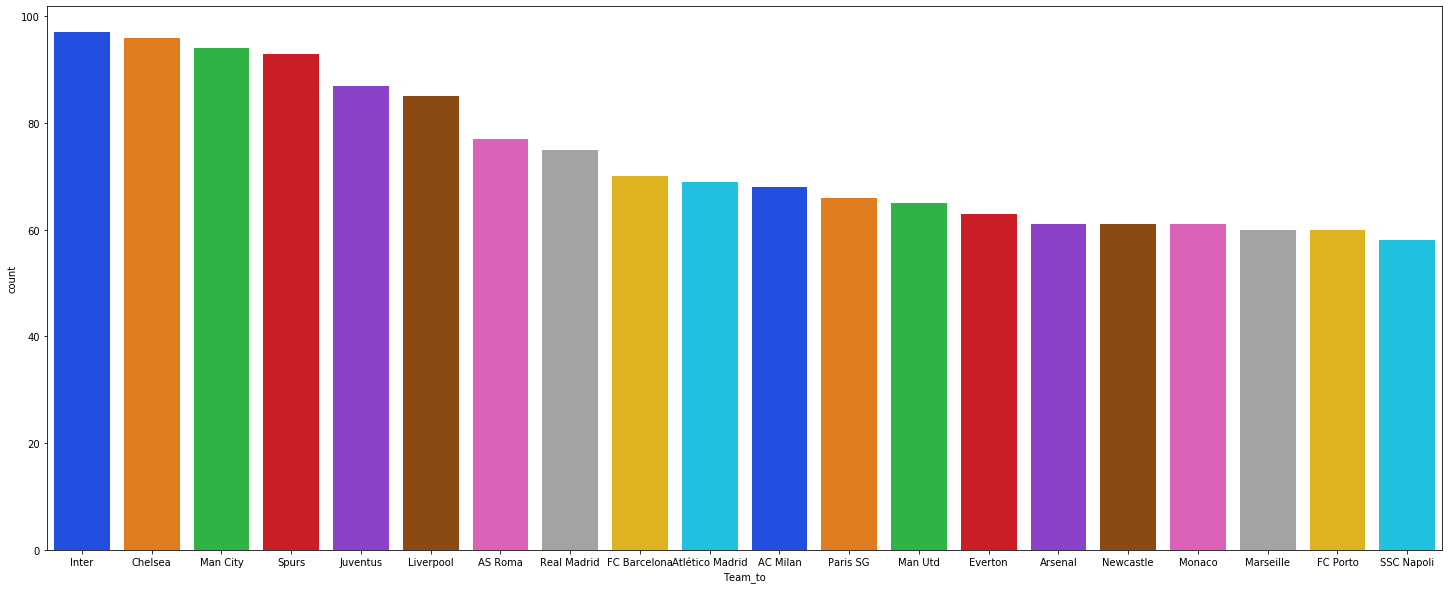

In [7]:
#Team Having most transfer over the dataset
plt.figure(figsize=(25,10))
sns.countplot(x= 'Team_to',data = df,order = df['Team_to'].value_counts().head(20).index,palette = "bright")

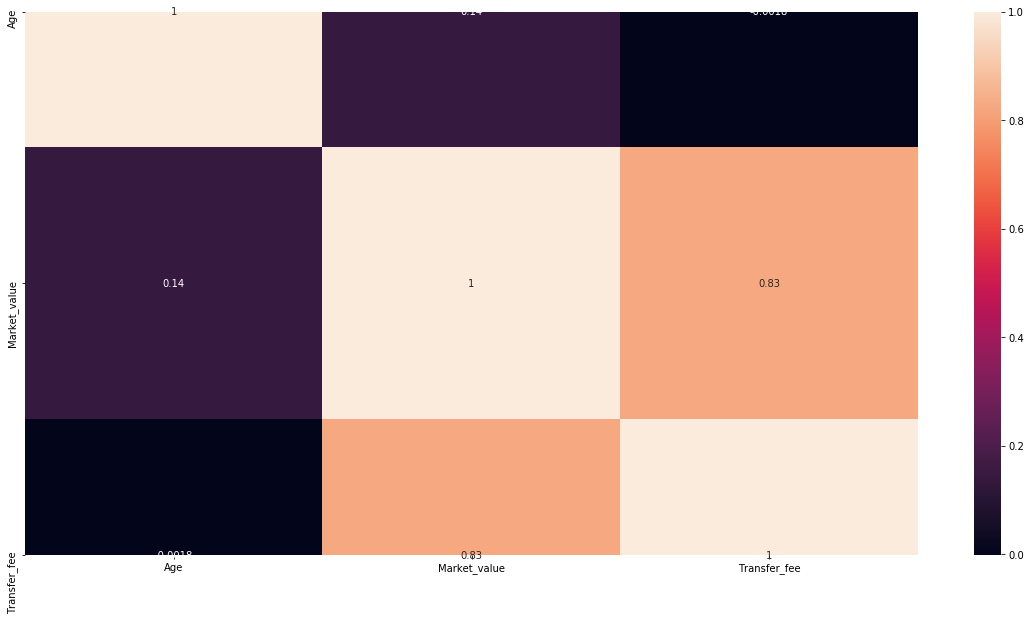

In [8]:
#Checking corelation between variables like age, Transfer_fee and market_value
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot = True)


In [9]:
#Correlation between Market Value and Transfer Value is high so one can estimate that if the market value of a player
#is high than so would be his Transfer fee.

#Age and Transfer fee has less correlation but it does make a sense as a player gets older his experience adds to his value to 
# a certain level but after that his value decreases This fact is also reflected in the age vs transfers graph plotted in R
